In [1]:
%matplotlib notebook

In [2]:
%run dataset.py
%run funcs.py

<IPython.core.display.Javascript object>


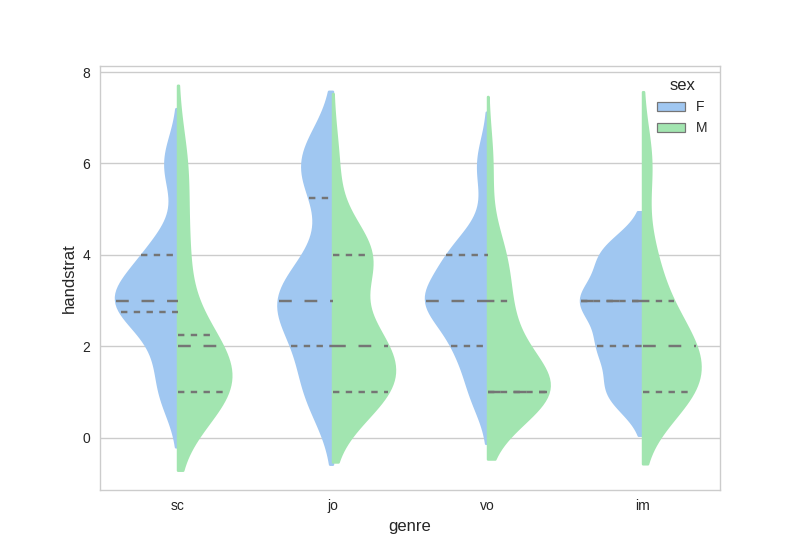

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.violinplot(x=avdataset['genre'],y=avdataset['handstrat'],hue=avdataset['sex'], 
                    split = True,inner="quart",palette='pastel', color_codes=True)

<IPython.core.display.Javascript object>


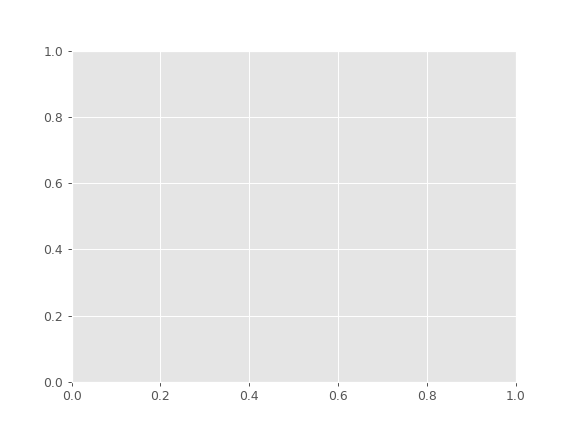

NameError: name 'sns' is not defined

In [18]:
fig,ax = plt.subplots()
x = avdataset['participant']
y = avdataset['zmin']
sns.violinplot(x, y, lowess=True, color="g")

In [11]:
# pitches[0]

<IPython.core.display.Javascript object>


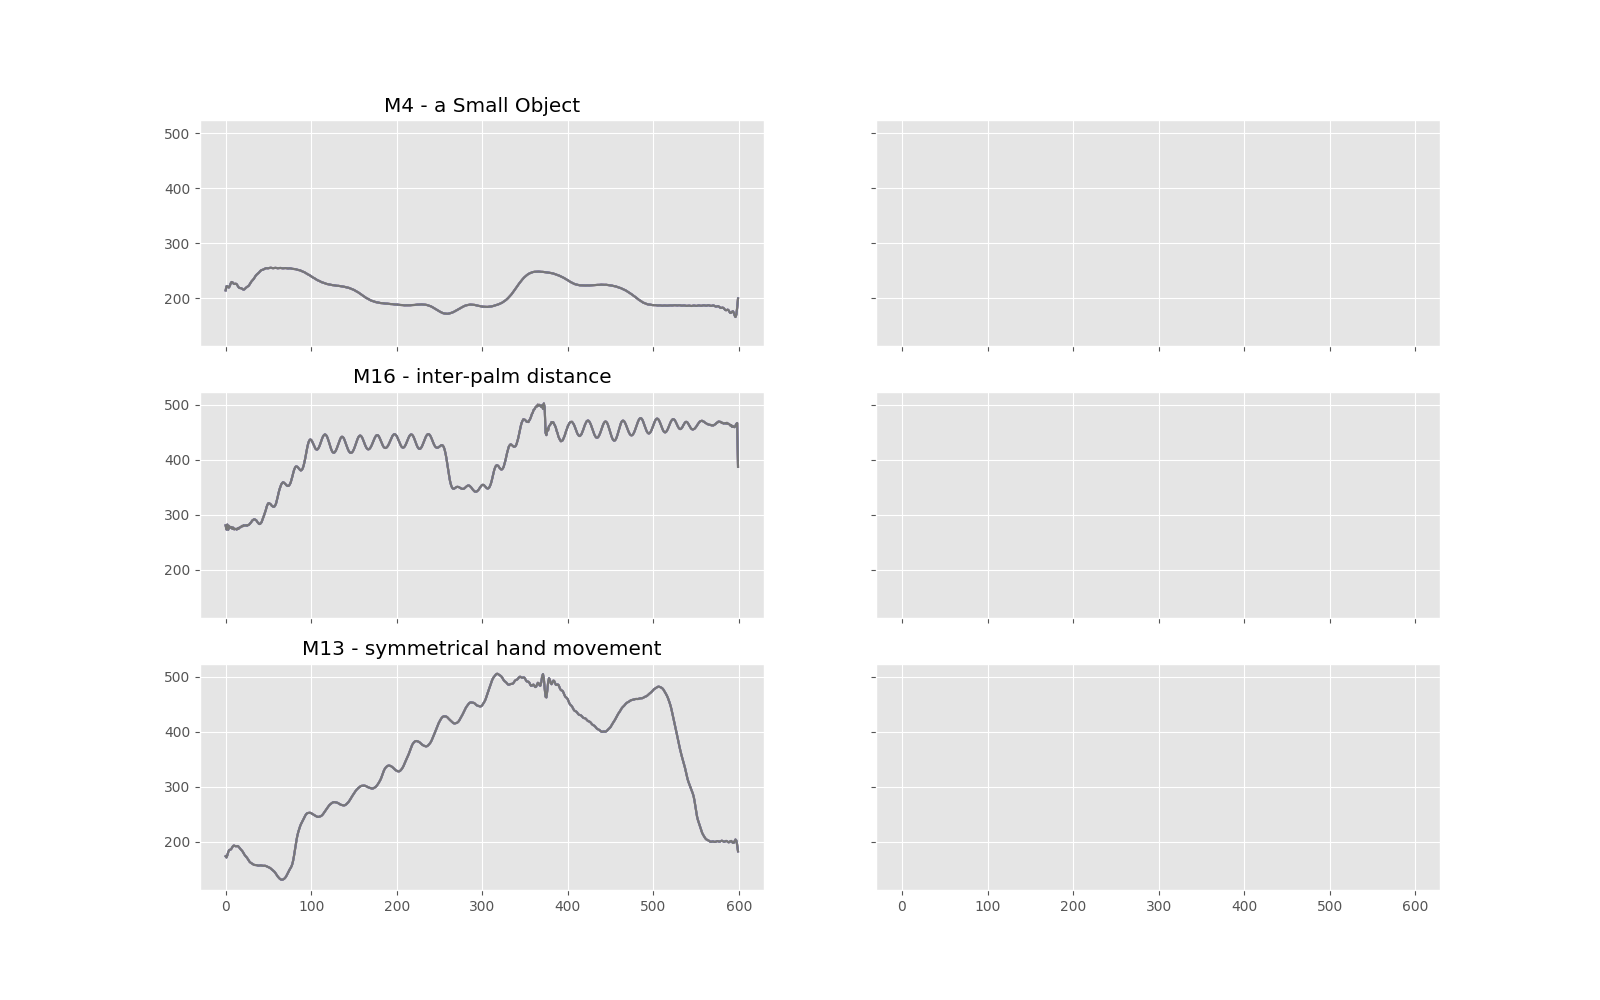

In [28]:
f, ax = plt.subplots(3,2,sharex=True,sharey=True,figsize = (16,10))
for i in range(4):
    ax[0,0].plot(pitches[3])
    ax[0,0].set_title('M4 - a Small Object')
    ax[1,0].plot(pitches[15])
    ax[1,0].set_title('M16 - inter-palm distance')
    ax[2,0].plot(pitches[12])
    ax[2,0].set_title('M13 - symmetrical hand movement')


In [5]:
pitches = []
names = []
im = [1,2,3,4,17,18,19,20]
jo = [5,6,7,8,21,22,23,24]
sc = [9,10,11,12,25,26,27,28]
vo = [13,14,15,16,29,30,31,32]

for i in range(1,17,1):
    strings = str(i)+'.txt'
    pitches.append(ups(readpitch(strings)['F0_Hz']))
    names.append(str(i))        

cols = ['names','pitches']
    
melodies = pd.DataFrame(zip(names,pitches))
melodies.columns = cols

In [145]:
%run dataext.py

In [16]:
# curve fit

import numpy as np
from scipy.optimize import leastsq

p0 = [0, 0, 0, 1]

def fitfunc(p, coords):
    x0, y0, z0, R = p
    x, y, z = coords.T
    return np.sqrt((x-x0)**2 + (y-y0)**2 + (z-z0)**2)

errfunc = lambda p, x: fitfunc(p, x) - p[3]

coordinates = []
keys = []

for i in range(len(pieces)):
    coords = pd.DataFrame.as_matrix(getlhrh(pieces[i])['rh'])
    p1, flag = leastsq(errfunc, p0, args=(coords,))
    coordinates.append(p1)
    keys.append(int(i))

IOError: File /home/tejaswik/Documents/CurrentProjects/melmot/data/normdatadump/7_14_6.csv does not exist

In [17]:
# spline interpolation
from scipy.interpolate import splprep

coords = pd.DataFrame.as_matrix(getlhrhn(pieces[1])['rh'])

tck,u = splprep(x=coords[:,0], w=coords[:,1], u=coords[:,2], ub=None, ue=None, 
                           k=3, task=0, s=None, t=None, full_output=0, nest=None, per=0, quiet=1)


NameError: name 'getlhrhn' is not defined